In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Display the first few rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Age,Loan_Purpose,Loan_Status
0,LID0001,Male,No,0,Graduate,No,21991,2139,368,360,1.0,Rural,27,Business,Approved
1,LID0002,Female,Yes,3+,Graduate,No,2841,14688,263,60,1.0,Rural,67,Personal,Approved
2,LID0003,Female,Yes,1,Graduate,No,13355,14906,166,60,1.0,Rural,20,Business,Approved
3,LID0004,Male,No,2,Graduate,No,1838,1704,435,360,1.0,Rural,30,Home,Approved
4,LID0005,Male,No,0,Graduate,No,7395,6924,393,60,1.0,Semiurban,60,Personal,Approved


Preprocessing of Data

In [ ]:
# Drop the Loan_ID column (identifier column)
df = df.drop(columns=['Loan_ID'])

# List of categorical columns to be one-hot encoded
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Purpose']

# Apply One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [ ]:
# Encode Loan_Status as 1 for Approved and 0 for Rejected
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Approved' else 0)
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal
0,21991,2139,368,360,1.0,27,1,True,False,False,False,False,False,False,False,False,False,False,False
1,2841,14688,263,60,1.0,67,1,False,True,False,False,True,False,False,False,False,False,False,True
2,13355,14906,166,60,1.0,20,1,False,True,True,False,False,False,False,False,False,False,False,False
3,1838,1704,435,360,1.0,30,1,True,False,False,True,False,False,False,False,False,False,True,False
4,7395,6924,393,60,1.0,60,1,True,False,False,False,False,False,False,True,False,False,False,True


Feature Engineering

In [ ]:
import numpy as np # Import numpy

# Combine ApplicantIncome and CoapplicantIncome into TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# Apply log transformation to TotalIncome to reduce skewness
df['LogTotalIncome'] = np.log(df['TotalIncome'] + 1)
# Create Loan-to-Income Ratio (LoanAmount / TotalIncome)
df['Loan_to_Income_Ratio'] = df['LoanAmount'] / df['TotalIncome']
# Encode Credit_History as a binary feature (Good/Bad)
df['Credit_History_Binary'] = df['Credit_History'].apply(lambda x: 1 if x == 1.0 else 0)


In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age,Loan_Status,Gender_Male,Married_Yes,Dependents_1,...,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,TotalIncome,LogTotalIncome,Loan_to_Income_Ratio,Credit_History_Binary
0,21991,2139,368,360,1.0,27,1,True,False,False,...,False,False,False,False,False,False,24130,10.091253,0.015251,1
1,2841,14688,263,60,1.0,67,1,False,True,False,...,False,False,False,False,False,True,17529,9.771669,0.015004,1
2,13355,14906,166,60,1.0,20,1,False,True,True,...,False,False,False,False,False,False,28261,10.249273,0.005874,1
3,1838,1704,435,360,1.0,30,1,True,False,False,...,False,False,False,False,True,False,3542,8.172729,0.122812,1
4,7395,6924,393,60,1.0,60,1,True,False,False,...,False,True,False,False,False,True,14319,9.569412,0.027446,1


In [ ]:
# Define the target variable (label) and features (X)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix # Import confusion_matrix

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')



Accuracy: 0.8500
Confusion Matrix:
[[ 1  2]
 [ 4 33]]


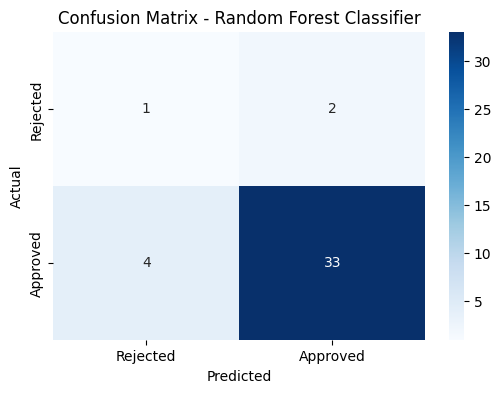

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix data
conf_matrix = [[1, 2],
               [4, 33]]

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.7500


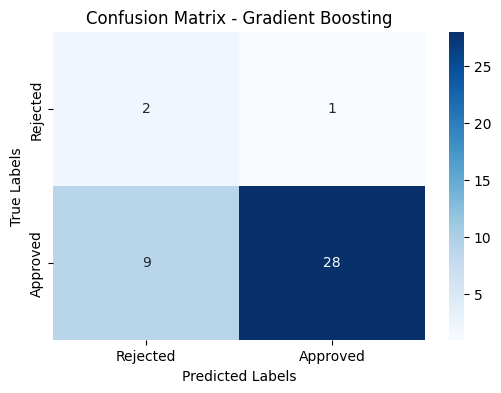

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train the Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])

# Add titles and labels
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


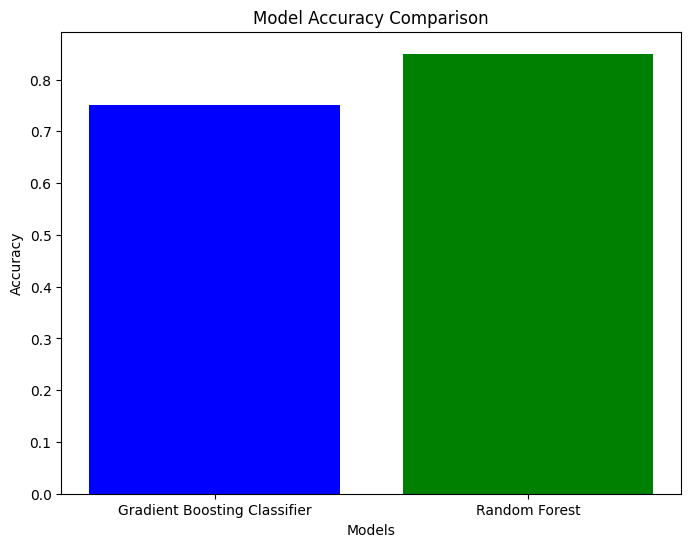

In [ ]:
import matplotlib.pyplot as plt

# Models and their respective accuracy values
models = ['Gradient Boosting Classifier', 'Random Forest']
accuracy_values = [ 0.7500, 0.8500]  # Replace with actual accuracy values from your model

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['blue', 'green'])

# Adding title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show plot
plt.show()
